In [155]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import Birch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.base import BaseEstimator, ClusterMixin


In [156]:
df = pd.read_csv('ADV.csv',index_col='customer_id')

In [157]:
#This version includes the debit ratio and the percent of cash transactions. The debit_percent feature is influential; removing it will change the number of clusters

In [158]:
df.head()

industry_code                           industry  \
customer_id                                                         
SYNCID0000000000          7292     Estate, Trust and Agency Funds   
SYNCID0000000001           NaN                                NaN   
SYNCID0000000002          7721                  Computer Services   
SYNCID0000000004          4565  Forest Products Trucking Industry   
SYNCID0000000005          7799     Other Business Services n.e.c.   

                         industry_group  employee_count     sales  \
customer_id                                                         
SYNCID0000000000   Investment Companies             0.0       0.0   
SYNCID0000000001                    NaN             NaN   66446.0   
SYNCID0000000002  Management Consulting             2.0       NaN   
SYNCID0000000004   Trucking and Freight             1.0  328160.0   
SYNCID0000000005  Management Consulting             1.0       0.0   

                  abm_num_debit  abm_avg_debit  abm_num_credit  \
customer_id                                                      
SYNCID0000000000            NaN            NaN             NaN   
SYNCID0000000001            NaN            NaN             NaN   
SYNCID0000000002            NaN            NaN             NaN   
SYNCID0000000004            NaN            NaN             NaN   
SYNCID0000000005            NaN            NaN             NaN   

                  abm_avg_credit  card_num_debit  ...  eft_num_debit  \
customer_id                                       ...                  
SYNCID0000000000             NaN             NaN  ...            NaN   
SYNCID0000000001             NaN             4.0  ...            NaN   
SYNCID0000000002             NaN             NaN  ...            NaN   
SYNCID0000000004             NaN            41.0  ...            NaN   
SYNCID0000000005             NaN             NaN  ...           15.0   

                  eft_avg_debit  eft_num_credit  eft_avg_credit  \
customer_id                                                       
SYNCID0000000000            NaN             NaN             NaN   
SYNCID0000000001            NaN             NaN             NaN   
SYNCID0000000002            NaN             NaN             NaN   
SYNCID0000000004            NaN             NaN             NaN   
SYNCID0000000005    8363.572667            35.0     1137.053714   

                  emt_num_debit  emt_avg_debit  emt_num_credit  \
customer_id                                                      
SYNCID0000000000            NaN            NaN             NaN   
SYNCID0000000001            NaN            NaN             NaN   
SYNCID0000000002            NaN            NaN             NaN   
SYNCID0000000004            NaN            NaN             NaN   
SYNCID0000000005            NaN            NaN             NaN   

                  emt_avg_credit  cash_percent  debit_percent  
customer_id                                                    
SYNCID0000000000             NaN           0.0      99.999554  
SYNCID0000000001             NaN           0.0     100.000000  
SYNCID0000000002             NaN           0.0      52.164736  
SYNCID0000000004             NaN           0.0      44.092805  
SYNCID0000000005             NaN           0.0      75.917236  

[5 rows x 31 columns]

In [159]:
df.fillna({'industry_code': 'Unknown'}, inplace=True)
df.fillna({'industry': 'Unknown'}, inplace=True) #could improve this bu putting other and null in different groups
df.fillna({'industry_group': 'Unknown'}, inplace=True) 

In [160]:
df['employee_count'] = df.groupby('industry_group')['employee_count'].transform(lambda x: x.fillna(x.mean()))
df['sales'] = df.groupby('industry_group')['sales'].transform(lambda x: x.fillna(x.mean()))

In [161]:
df.fillna(0.0, inplace=True)

In [162]:
df.head()

industry_code                           industry  \
customer_id                                                         
SYNCID0000000000          7292     Estate, Trust and Agency Funds   
SYNCID0000000001       Unknown                            Unknown   
SYNCID0000000002          7721                  Computer Services   
SYNCID0000000004          4565  Forest Products Trucking Industry   
SYNCID0000000005          7799     Other Business Services n.e.c.   

                         industry_group  employee_count          sales  \
customer_id                                                              
SYNCID0000000000   Investment Companies         0.00000       0.000000   
SYNCID0000000001                Unknown         2.16297   66446.000000   
SYNCID0000000002  Management Consulting         2.00000  193864.737815   
SYNCID0000000004   Trucking and Freight         1.00000  328160.000000   
SYNCID0000000005  Management Consulting         1.00000       0.000000   

                  abm_num_debit  abm_avg_debit  abm_num_credit  \
customer_id                                                      
SYNCID0000000000            0.0            0.0             0.0   
SYNCID0000000001            0.0            0.0             0.0   
SYNCID0000000002            0.0            0.0             0.0   
SYNCID0000000004            0.0            0.0             0.0   
SYNCID0000000005            0.0            0.0             0.0   

                  abm_avg_credit  card_num_debit  ...  eft_num_debit  \
customer_id                                       ...                  
SYNCID0000000000             0.0             0.0  ...            0.0   
SYNCID0000000001             0.0             4.0  ...            0.0   
SYNCID0000000002             0.0             0.0  ...            0.0   
SYNCID0000000004             0.0            41.0  ...            0.0   
SYNCID0000000005             0.0             0.0  ...           15.0   

                  eft_avg_debit  eft_num_credit  eft_avg_credit  \
customer_id                                                       
SYNCID0000000000       0.000000             0.0        0.000000   
SYNCID0000000001       0.000000             0.0        0.000000   
SYNCID0000000002       0.000000             0.0        0.000000   
SYNCID0000000004       0.000000             0.0        0.000000   
SYNCID0000000005    8363.572667            35.0     1137.053714   

                  emt_num_debit  emt_avg_debit  emt_num_credit  \
customer_id                                                      
SYNCID0000000000            0.0            0.0             0.0   
SYNCID0000000001            0.0            0.0             0.0   
SYNCID0000000002            0.0            0.0             0.0   
SYNCID0000000004            0.0            0.0             0.0   
SYNCID0000000005            0.0            0.0             0.0   

                  emt_avg_credit  cash_percent  debit_percent  
customer_id                                                    
SYNCID0000000000             0.0           0.0      99.999554  
SYNCID0000000001             0.0           0.0     100.000000  
SYNCID0000000002             0.0           0.0      52.164736  
SYNCID0000000004             0.0           0.0      44.092805  
SYNCID0000000005             0.0           0.0      75.917236  

[5 rows x 31 columns]

In [163]:
df_numeric = df.select_dtypes(include=['number'])

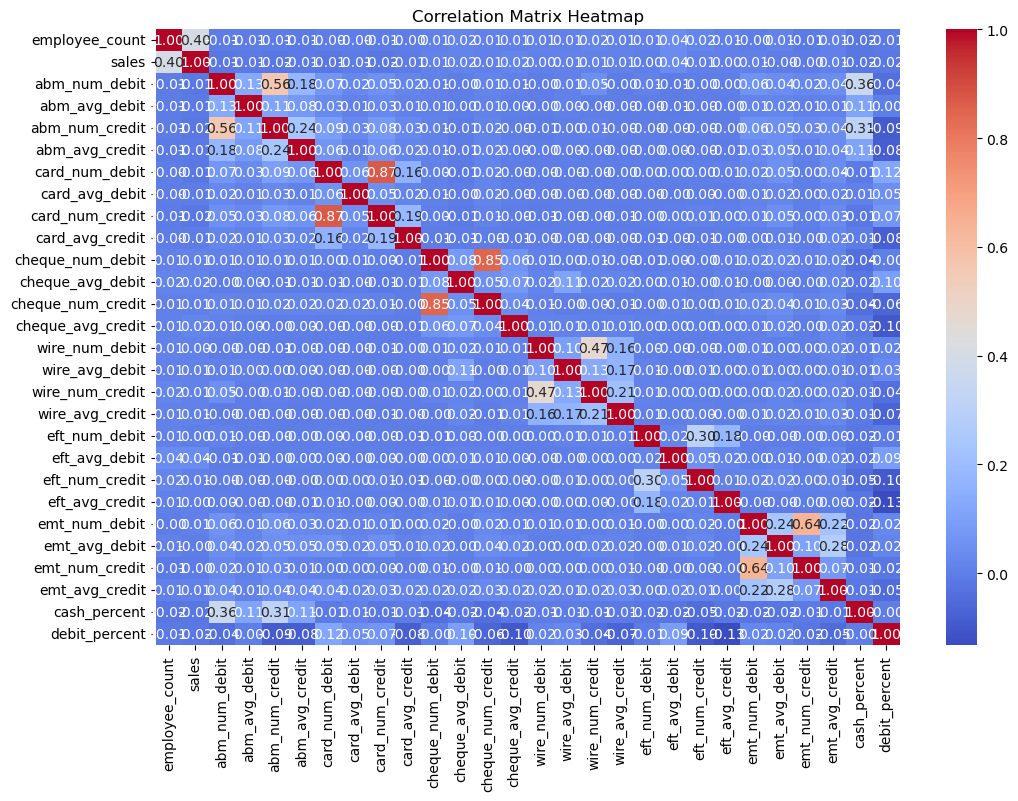

In [164]:
##Correlation matrix
correlation_matrix = df_numeric.corr()

##Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [165]:
df_numeric.drop(columns = ['card_num_credit','cheque_num_credit'],inplace=True)

In [166]:
#Scale the features with minmax scaler
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

In [167]:
# This section is base code from ChatGPT

class BirchClustering(BaseEstimator, ClusterMixin):
    def __init__(self, threshold=0.5, branching_factor=50, n_clusters=None):
        self.threshold = threshold
        self.branching_factor = branching_factor
        self.n_clusters = n_clusters
    
    def fit(self, X, y=None):
        self.model_ = Birch(threshold=self.threshold, 
                            branching_factor=self.branching_factor, 
                            n_clusters=self.n_clusters)
        self.model_.fit(X)
        return self

    def predict(self, X):
        return self.model_.predict(X)
    
    def fit_predict(self, X, y=None):
        return self.fit(X).predict(X)

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) < 2:  # Silhouette score requires at least 2 clusters
        return -1  # Assign a low score for invalid clustering
    return silhouette_score(X, labels)

param_grid = {
    'threshold': [0.1,0.3, 0.5, 0.7],
    'branching_factor': [5,10,25, 50, 75],
    'n_clusters': [None, 3,4, 5]
}

# Perform grid search
grid_search = GridSearchCV(BirchClustering(), param_grid, cv=5, scoring=silhouette_scorer, n_jobs=-1)
grid_search.fit(data_scaled)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Get cluster predictions
labels = best_model.fit_predict(data_scaled)

# Compute silhouette score
silhouette_avg = silhouette_score(data_scaled, labels)
print("Silhouette Score:", silhouette_avg)


Best Parameters: {'branching_factor': 5, 'n_clusters': None, 'threshold': 0.3}
Silhouette Score: 0.49250656789321695


In [168]:
#I'm just going to force 4 clusters because I don't think 2 is enough granularity
#birch = Birch(threshold = 0.2,n_clusters=4)  # Smaller threshold → More clusters
#birch.fit(data_scaled)
#labels = birch.predict(data_scaled)

In [169]:
df_numeric['ClusterBIRCH'] = labels
df_numeric

employee_count         sales  abm_num_debit  abm_avg_debit  \
customer_id                                                                    
SYNCID0000000000        0.000000  0.000000e+00            0.0            0.0   
SYNCID0000000001        2.162970  6.644600e+04            0.0            0.0   
SYNCID0000000002        2.000000  1.938647e+05            0.0            0.0   
SYNCID0000000004        1.000000  3.281600e+05            0.0            0.0   
SYNCID0000000005        1.000000  0.000000e+00            0.0            0.0   
...                          ...           ...            ...            ...   
SYNCID0000017178        1.000000  0.000000e+00            0.0            0.0   
SYNCID0000017179        0.000000  0.000000e+00            0.0            0.0   
SYNCID0000017180        1.686131  1.000000e+00            0.0            0.0   
SYNCID0000017181       20.000000  4.833395e+06            0.0            0.0   
SYNCID0000017182        2.000000  0.000000e+00            0.0            0.0   

                  abm_num_credit  abm_avg_credit  card_num_debit  \
customer_id                                                        
SYNCID0000000000             0.0             0.0             0.0   
SYNCID0000000001             0.0             0.0             4.0   
SYNCID0000000002             0.0             0.0             0.0   
SYNCID0000000004             0.0             0.0            41.0   
SYNCID0000000005             0.0             0.0             0.0   
...                          ...             ...             ...   
SYNCID0000017178             0.0             0.0             0.0   
SYNCID0000017179             0.0             0.0             0.0   
SYNCID0000017180             0.0             0.0             0.0   
SYNCID0000017181             0.0             0.0             0.0   
SYNCID0000017182             0.0             0.0             0.0   

                  card_avg_debit  card_avg_credit  cheque_num_debit  ...  \
customer_id                                                          ...   
SYNCID0000000000        0.000000             0.00               1.0  ...   
SYNCID0000000001       72.847500             0.00               0.0  ...   
SYNCID0000000002        0.000000             0.00              14.0  ...   
SYNCID0000000004      183.759024          3184.28               0.0  ...   
SYNCID0000000005        0.000000             0.00               0.0  ...   
...                          ...              ...               ...  ...   
SYNCID0000017178        0.000000             0.00              11.0  ...   
SYNCID0000017179        0.000000             0.00               0.0  ...   
SYNCID0000017180        0.000000             0.00               0.0  ...   
SYNCID0000017181        0.000000             0.00               0.0  ...   
SYNCID0000017182        0.000000             0.00               1.0  ...   

                  eft_avg_debit  eft_num_credit  eft_avg_credit  \
customer_id                                                       
SYNCID0000000000       0.000000             0.0        0.000000   
SYNCID0000000001       0.000000             0.0        0.000000   
SYNCID0000000002       0.000000             0.0        0.000000   
SYNCID0000000004       0.000000             0.0        0.000000   
SYNCID0000000005    8363.572667            35.0     1137.053714   
...                         ...             ...             ...   
SYNCID0000017178     358.706667             1.0     4993.020000   
SYNCID0000017179    4076.141457            79.0     9067.926582   
SYNCID0000017180       0.000000             0.0        0.000000   
SYNCID0000017181    1052.547273            22.0     2221.887273   
SYNCID0000017182    1335.976667            11.0     1586.713636   

                  emt_num_debit  emt_avg_debit  emt_num_credit  \
customer_id                                                      
SYNCID0000000000            0.0          0.000             0.0   
SYNCID0000000001            0.0  

In [170]:
df_numeric['ClusterBIRCH'].value_counts()

ClusterBIRCH
0    9076
1    7179
Name: count, dtype: int64

In [171]:
df['ClusterBIRCH'] = labels

In [172]:
X0 = df_numeric[df_numeric['ClusterBIRCH']==0].iloc[:,:-1]
X1 = df_numeric[df_numeric['ClusterBIRCH']==1].iloc[:,:-1]

In [173]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.1, random_state=42)

clf.fit(X0)
y_pred = clf.predict(X0)
X0['anomoly']=y_pred

clf.fit(X1)
y_pred = clf.predict(X1)
X1['anomoly']=y_pred

In [174]:
result = pd.concat([X0, X1], ignore_index=False)n

In [175]:
anomoly_list = result[result['anomoly']==-1].index

In [176]:
np.savetxt("anomolies_BIRCHCluster10pct.csv", anomoly_list.to_numpy(), fmt='%s', delimiter=",")